In [1]:
from prody import *

In [2]:
ubi = parsePDB('2k39', subset='calpha')
ubi = ubi.select('resnum < 71')

@> PDB file is found in working directory (2k39.pdb.gz).


@> 76 atoms and 116 coordinate set(s) were parsed in 0.45s.


In [3]:
ens = Ensemble('Ubiquitin')
ens.setCoords(ubi.getCoords())
ens.addCoordset(ubi.getCoordsets())

In [4]:
pca = PCA('Ubiquitin')
pca.buildCovariance(ens)
pca.calcModes(n_modes=None)

@> Covariance is calculated using 116 coordinate sets.


@> Covariance matrix calculated in 0.018569s.


@> 115 modes were calculated in 0.02s.


In [5]:
print(pca[0].getEigval())
u = pca[0].getEigvec()
v = pca[1].getEigvec()
print(u.dot(u))
print(u.dot(v))

7.20369699064
1.0
-4.86806775446e-17


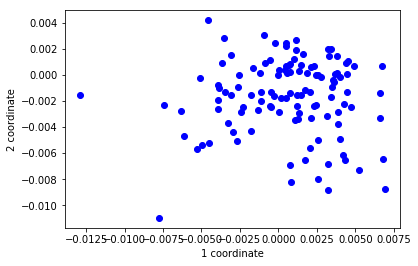

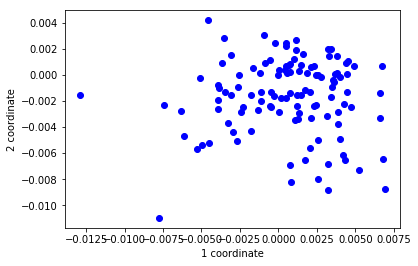

In [6]:
showProjection(ens, pca[(0, 1)])

In [7]:
ubi.setACSIndex(78)
anm = ANM('Ubiquitin')
anm.buildHessian(ubi)
anm.calcModes(n_modes=None)

@> Hessian was built in 0.05s.


@> 204 modes were calculated in 0.01s.


In [8]:
print(anm[0].getEigvec().dot(anm[1].getEigvec()))


1.82145964978e-16


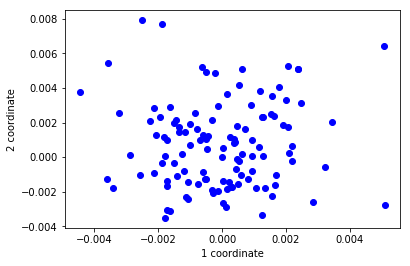

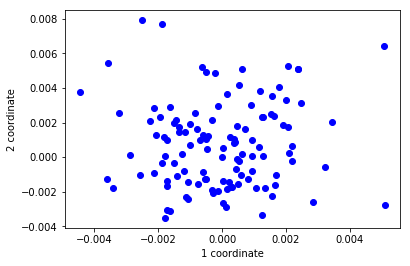

In [9]:
showProjection(ens, anm[(0, 1)])

In [10]:
print(anm[0].getEigvec().dot(pca[0].getEigvec()))

-0.193226981164


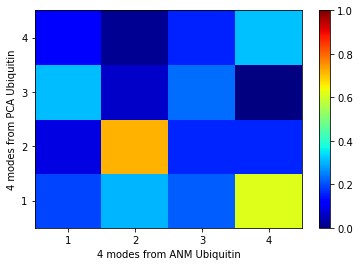

(<matplotlib.collections.PolyCollection at 0x22eb79676d8>,
 <matplotlib.colorbar.Colorbar at 0x22eb79a3d30>)

In [11]:
showOverlapTable(anm[:4], pca[:4])

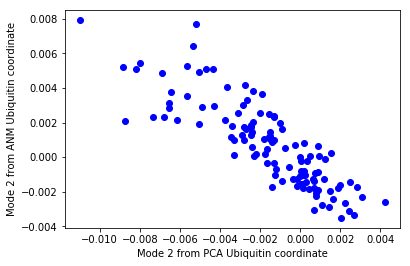

In [12]:
showCrossProjection(ens, pca[1], anm[1])

In [13]:
printOverlapTable(anm[:4], pca[:4])

Overlap Table
                         PCA Ubiquitin
                     #1     #2     #3     #4
ANM Ubiquitin #1   -0.19  +0.09  +0.31  +0.11
ANM Ubiquitin #2   -0.30  -0.72  -0.06  +0.02
ANM Ubiquitin #3   +0.22  -0.16  -0.23  +0.16
ANM Ubiquitin #4   -0.62  +0.16   0.00  -0.31

